In [1]:
import os
import json
import math
import numpy as np 
import pandas as pd

# ## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0001
# import seaborn as sns
# sns.reset_orig()
# sns.set()


## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

C:\Users\Michał\AppData\Local\Temp\ipykernel_15376\292037682.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cuda:0


## Przygotowanie danych

In [3]:
# Transformations applied on each image => only make them a tensor
transform = transforms.Compose([transforms.ToTensor()])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = FashionMNIST(root="data/", train=True, transform=transform, download=True)

# Loading the test set
test_set = FashionMNIST(root="data/", train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)

def get_train_images(num):
    return torch.stack([test_set[i][0] for i in range(10,10+num)], dim=0)

# Generative Adversarial Networks

In [4]:
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out  = nn.Linear(hidden_dim, 1)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        x = self.fc_out(x)
        return x

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(latent_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))
        
        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 1, 28, 28])
        return x_hat

In [15]:
# Models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=256, output_dim=784).to(device)
discriminator = Discriminator( hidden_dim=256, input_dim=784).to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

In [16]:
fixed_noise = torch.randn(16, latent_dim,device=device)

In [8]:
fixed_noise.shape

torch.Size([16, 32])

Epoch: 0, discriminator fake error: 0.000329, discriminator real acc: 0.991


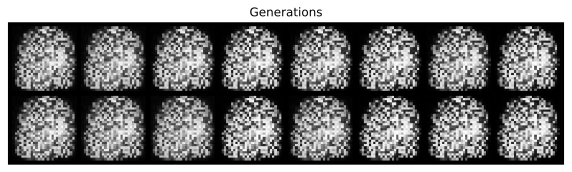

Epoch: 1, discriminator fake error: 0.00018, discriminator real acc: 0.995
Epoch: 2, discriminator fake error: 0.000245, discriminator real acc: 0.997
Epoch: 3, discriminator fake error: 0.000236, discriminator real acc: 0.998
Epoch: 4, discriminator fake error: 0.000228, discriminator real acc: 0.999
Epoch: 5, discriminator fake error: 0.000199, discriminator real acc: 0.999
Epoch: 6, discriminator fake error: 0.000196, discriminator real acc: 0.999
Epoch: 7, discriminator fake error: 0.000163, discriminator real acc: 0.999
Epoch: 8, discriminator fake error: 0.000199, discriminator real acc: 1.0
Epoch: 9, discriminator fake error: 0.000139, discriminator real acc: 1.0
Epoch: 10, discriminator fake error: 0.000187, discriminator real acc: 1.0


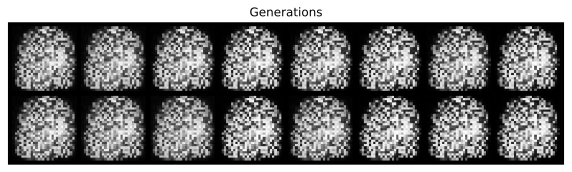

Epoch: 11, discriminator fake error: 0.000149, discriminator real acc: 1.0
Epoch: 12, discriminator fake error: 0.000147, discriminator real acc: 1.0
Epoch: 13, discriminator fake error: 0.000173, discriminator real acc: 1.0
Epoch: 14, discriminator fake error: 0.000124, discriminator real acc: 1.0
Epoch: 15, discriminator fake error: 0.000141, discriminator real acc: 1.0
Epoch: 16, discriminator fake error: 0.000115, discriminator real acc: 1.0
Epoch: 17, discriminator fake error: 0.00015, discriminator real acc: 1.0
Epoch: 18, discriminator fake error: 0.000117, discriminator real acc: 1.0
Epoch: 19, discriminator fake error: 0.000108, discriminator real acc: 1.0
Epoch: 20, discriminator fake error: 0.000135, discriminator real acc: 1.0


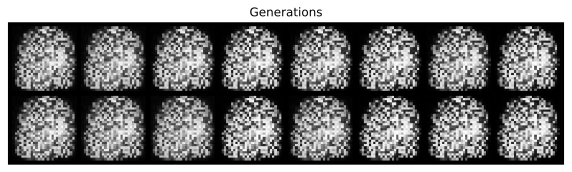

Epoch: 21, discriminator fake error: 8.86e-05, discriminator real acc: 1.0
Epoch: 22, discriminator fake error: 0.000151, discriminator real acc: 1.0
Epoch: 23, discriminator fake error: 9.05e-05, discriminator real acc: 1.0
Epoch: 24, discriminator fake error: 7.4e-05, discriminator real acc: 1.0
Epoch: 25, discriminator fake error: 9.36e-05, discriminator real acc: 1.0
Epoch: 26, discriminator fake error: 9.4e-05, discriminator real acc: 1.0
Epoch: 27, discriminator fake error: 0.000125, discriminator real acc: 1.0
Epoch: 28, discriminator fake error: 5.39e-05, discriminator real acc: 1.0


KeyboardInterrupt: 

In [23]:
G_losses = []
D_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    # For each batch in the dataloader
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(train_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        discriminator_optimizer.zero_grad()
        # Format batch
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        label = torch.ones((b_size,), dtype=torch.float, device=device) # Setting labels for real images
        # Forward pass real batch through D
        output = discriminator(real_images).view(-1)
        # Calculate loss on all-real batch
        error_discriminator_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        error_discriminator_real.backward()
        discriminator_real_acc.append(output.mean().item())

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_dim,device=device)
        # Generate fake image batch with Generator
        fake_images = generator(noise)
        label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
        # Classify all fake batch with Discriminator
        output = discriminator(fake_images.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        error_discriminator_fake = criterion(output, label_fake)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        error_discriminator_fake.backward()
        discriminator_fake_acc.append(output.mean().item())

        # Compute error of D as sum over the fake and the real batches
        error_discriminator = error_discriminator_real + error_discriminator_fake
        # Update D
        discriminator_optimizer.step()

        # ############################
        # # (2) Update G network: maximize log(D(G(z)))
        # ###########################
        # generator_optimizer.zero_grad()
        # label = torch.ones((b_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
        # # Since we just updated D, perform another forward pass of all-fake batch through D
        # output = discriminator(fake_images).view(-1)
        # # Calculate G's loss based on this output
        # error_generator = criterion(output, label)
        # # Calculate gradients for G
        # error_generator.backward()
        # D_G_z2 = output.mean().item()
        # # Update G
        # generator_optimizer.step()

        # Output training stats
        # Save Losses for plotting later
        # G_losses.append(error_generator.item())
        D_losses.append(error_discriminator.item())

    print(f"Epoch: {epoch}, discriminator fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

In [24]:
noise = torch.randn(b_size, latent_dim,device=device)
noise = torch.randn(b_size, latent_dim,device=device)
# Generate fake image batch with Generator
fake_images = generator(noise)
label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
# Classify all fake batch with Discriminator
output = discriminator(fake_images.detach()).view(-1)
# Calculate D's loss on the all-fake batch
error_discriminator_fake = criterion(output, label_fake)
print(output)
print(error_discriminator_fake)

tensor([-4.9073e-04,  1.2818e-03, -1.1135e-04,  4.5332e-04,  2.7289e-03,
        -1.2124e-03,  1.3098e-03,  1.4947e-03, -1.7054e-03,  5.2346e-04,
        -3.7090e-04,  2.4606e-03,  1.5620e-03, -4.4490e-03,  3.6672e-04,
        -1.8387e-03,  3.8071e-03,  3.7853e-03,  3.6325e-03, -1.7292e-03,
         1.6623e-04,  2.4829e-03, -6.8038e-04,  2.6377e-03,  2.6037e-03,
         1.0052e-03,  1.8246e-03,  3.8823e-04, -2.3446e-03, -1.3762e-03,
        -4.8273e-04,  1.0103e-03,  8.9571e-05,  4.0767e-03, -1.1007e-03,
         1.5738e-03,  1.6448e-03, -1.3457e-03, -3.0541e-04,  2.2144e-03,
         3.9709e-03,  1.2308e-03,  1.3039e-03, -8.3808e-04, -8.5493e-04,
         8.7228e-04,  1.2357e-03, -6.5716e-04,  2.2240e-03,  2.4343e-03,
         1.7259e-03,  1.3532e-03,  1.6988e-03, -1.6741e-03, -1.1759e-03,
        -1.0953e-03, -5.5550e-04,  5.2980e-03, -2.6641e-04,  4.8208e-03,
         3.3763e-03,  6.8789e-04,  2.0766e-03,  1.3467e-03,  2.6205e-03,
         3.4291e-04, -2.4392e-04, -5.4291e-04,  1.8

In [25]:
real_images = next(iter(train_loader))[0].to(device)
label_real = torch.ones((b_size,), dtype=torch.float, device=device)
# Classify all fake batch with Discriminator
output = discriminator(real_images.detach()).view(-1)
# Calculate D's loss on the all-fake batch
error_discriminator_real = criterion(output, label_real)
print(output)
print(error_discriminator_real)

tensor([0.9864, 0.9990, 1.0014, 0.9991, 0.9943, 0.9983, 0.9990, 1.0091, 0.9987,
        1.0010, 1.0044, 0.9988, 0.9995, 1.0231, 1.0093, 1.0015, 0.9975, 1.0082,
        0.9911, 1.0089, 0.9974, 1.0038, 1.0041, 0.9942, 1.0128, 1.0050, 1.0026,
        0.9993, 0.9963, 0.9972, 1.0033, 1.0010, 1.0077, 1.0115, 1.0222, 0.9871,
        1.0159, 1.0146, 0.9985, 1.0024, 0.9938, 0.9949, 0.9933, 0.9991, 0.9995,
        0.9858, 0.9793, 1.0007, 0.9898, 1.0021, 1.0007, 1.0029, 1.0082, 0.9975,
        1.0008, 0.9945, 1.0021, 1.0129, 1.0017, 0.9987, 1.0099, 1.0047, 1.0052,
        1.0052, 1.0042, 1.0128, 1.0032, 0.9982, 1.0173, 1.0197, 0.9913, 0.9922,
        0.9991, 1.0082, 1.0002, 1.0194, 1.0060, 1.0005, 0.9905, 0.9921, 1.0232,
        1.0015, 1.0082, 1.0059, 1.0236, 1.0149, 1.0012, 0.9916, 1.0046, 1.0005,
        1.0069, 1.0048, 1.0114, 1.0093, 0.9989, 1.0049, 1.0043, 1.0086, 1.0008,
        1.0091, 1.0151, 0.9861, 0.9980, 0.9975, 1.0135, 1.0084, 0.9997, 0.9903,
        1.0082, 1.0047, 0.9891, 0.9875, 

In [18]:
print(output.mean().item())

0.12905816733837128


In [10]:
fake = generator(fixed_noise)

In [62]:
discriminator(fake)

tensor([[-2.5834],
        [-2.6190],
        [-2.5342],
        [-2.7131],
        [-2.6446],
        [-2.5809],
        [-2.6999],
        [-2.6226],
        [-2.5983],
        [-2.7907],
        [-2.5887],
        [-2.5375],
        [-2.5572],
        [-2.6138],
        [-2.5148],
        [-2.6071]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [51]:
torch.save(discriminator.state_dict(), "../src/gan/resources/discriminator_notebook")

In [57]:
generator.load_state_dict(torch.load("../src/gan/models/gan_ndes_generator_163288.1718697.pth.tar")['state_dict'])

<All keys matched successfully>

In [60]:
print(f"Num params: {sum([param.nelement() for param in generator.parameters()])}")

Num params: 275728


## Stwórzmy model warunkowany klasą
Może się przydać F.one_hot

# Ewaluacja modeli generatywnych

In [27]:
class Evaluator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Evaluator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, 50)
        self.fc_out  = nn.Linear(50, 10)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def get_features(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        return x
    

    def forward(self, x):
        x = self.get_features(x)
        x = self.fc_out(x)
        return x

evaluator = Evaluator(28*28, 256).to(device)

In [28]:
# Optimizers
optimizer = torch.optim.Adam(evaluator.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.97)

# loss
criterion = nn.CrossEntropyLoss()

In [29]:
num_epochs = 7
for epoch in range(num_epochs):
    for data, targets in iter(train_loader):
        data = data.to(device)
        targets = targets.to(device)

        results = evaluator(data)
        loss = criterion(results, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [30]:
num_correct = 0
total_guesses = 0

evaluator.eval()
with torch.no_grad():
    for data, targets in iter(test_loader):
        # Sends data and targets to device
        data = data.to(device)
        targets = targets.to(device)

        # Acquires the network's best guesses at each class
        results = evaluator(data)
        best_guesses = torch.argmax(results, 1)

        # Updates number of correct and total guesses
        num_correct += torch.eq(targets, best_guesses).sum().item()
        total_guesses += len(targets)

print("Correctly guessed ", num_correct/total_guesses*100, "% of the dataset")

Correctly guessed  87.02 % of the dataset


In [31]:
with torch.no_grad():
    fixed_noise = torch.randn(1000, latent_dim,device=device)
    fixed_labels = torch.randint(10,(1000,),device=device)
    fixed_labels = F.one_hot(fixed_labels, 10).float()
    # generations_cond_gan = cond_generator(fixed_noise, fixed_labels)
    generations_gan = generator(fixed_noise)
    # generations_vae = vae.decoder(fixed_noise)

In [32]:
orig_data = [x[0] for x in list(test_set)[:1000]]
orig_data = torch.cat(orig_data)

In [33]:
with torch.no_grad():
    dist_orig_data = evaluator.get_features(orig_data.to(device)).cpu()
    # dist_vae = evaluator.get_features(generations_vae.to(device)).cpu()
    dist_gan = evaluator.get_features(generations_gan.to(device)).cpu()
    # dist_cond_gan = evaluator.get_features(generations_cond_gan.to(device)).cpu()

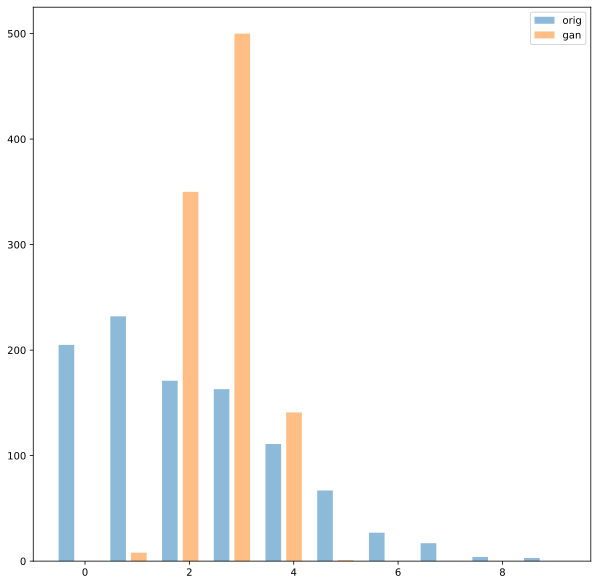

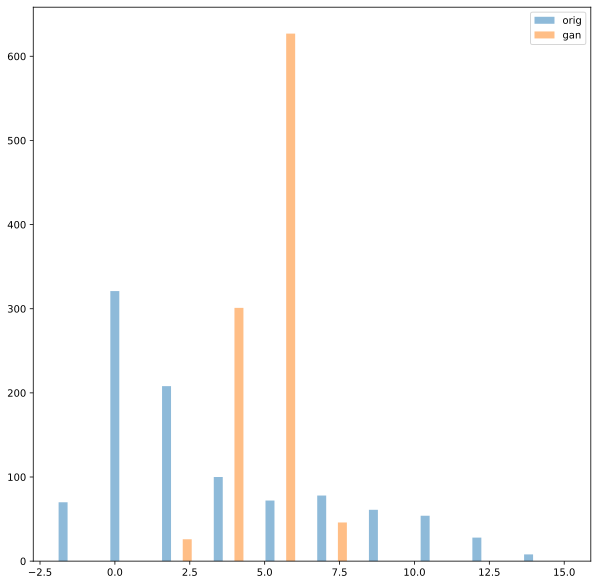

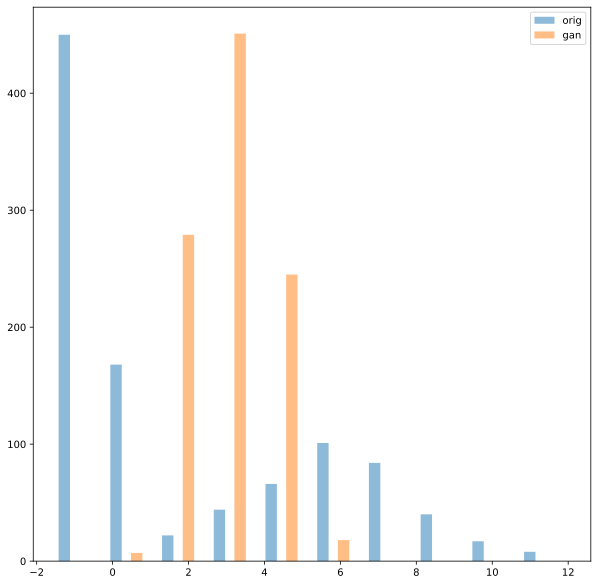

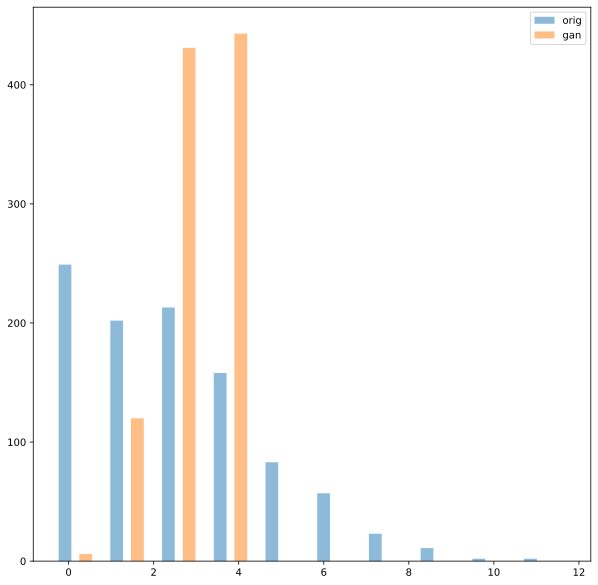

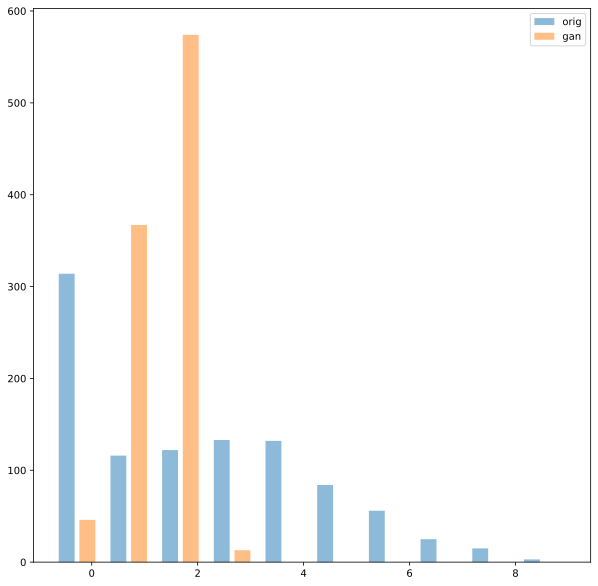

In [34]:
for idx in range(5):
    bins = 10
    w = 0.3
    plt.figure(figsize=(10,10))
    # plt.hist([dist_orig_data[:,idx].numpy(),dist_vae[:,idx].numpy(),dist_gan[:,idx], dist_cond_gan[:,idx]], bins, alpha=0.5, label=['orig','vae','gan','cond_gan'],width=w)
    plt.hist([dist_orig_data[:,idx].numpy(),dist_gan[:,idx]], bins, alpha=0.5, label=['orig','gan'],width=w)
    plt.legend(loc='upper right')
    plt.show();
    plt.close()

In [35]:
######### Frechet Inception distance based on implementation from https://github.com/mseitzer/pytorch-fid

import numpy as np
from scipy import linalg


def calculate_frechet_distance(distribution_1, distribution_2, eps=1e-6):
    mu1 = np.mean(distribution_1, axis=0)
    sigma1 = np.cov(distribution_1, rowvar=False)

    mu2 = np.mean(distribution_2, axis=0)
    sigma2 = np.cov(distribution_2, rowvar=False)

    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).
    Stable version by Dougal J. Sutherland.
    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.
    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)

In [36]:
orig_data_2 = [x[0] for x in list(test_set)[-1000:]]
orig_data_2 = torch.cat(orig_data_2)
with torch.no_grad():
    dist_orig_data_2 = evaluator.get_features(orig_data_2.to(device)).cpu()

In [37]:
# for name, obj in zip(['orig','vae','gan','cond_gan'],[dist_orig_data_2.numpy(),dist_vae.numpy(),dist_gan.numpy(), dist_cond_gan.numpy()]):
for name, obj in zip(['orig', 'gan'],[dist_orig_data_2.numpy(),dist_gan.numpy()]):
    print(f"FD {name}: {calculate_frechet_distance(dist_orig_data.numpy(),obj)}")

FD orig: 1.8406806197092465
FD gan: 297.07118339914376
